In [38]:
import numpy as np
import pandas as pd

In [39]:
news = pd.read_csv("News_dataset.csv")

In [40]:
news.shape

(44919, 6)

In [41]:
news['class'].value_counts()

class
0    23502
1    21417
Name: count, dtype: int64

In [42]:
news.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [43]:
news = news.sample(frac=0.25)
news.reset_index(inplace=True)
news.shape

(11230, 7)

In [44]:
news.head()

,index,Unnamed: 0,title,text,subject,date,class
0,41328,17826,"U.N. bans four ships over North Korea coal, U....",UNITED NATIONS (Reuters) - The United Nations ...,worldnews,"October 10, 2017",1
1,32757,9255,Trump should stop attacking minority groups: S...,WASHINGTON (Reuters) - Presumptive Republican ...,politicsNews,"June 7, 2016",1
2,33698,10196,"Macri vows now, ""mature"" relationship with the...",BUENOS AIRES (Reuters) - Argentine leader Maur...,politicsNews,"March 23, 2016",1
3,22288,22288,"Patrick and Hesher: ‘DNI, CIA have lost the pl...",21st Century Wire says RUSSIA HACK? Still no e...,US_News,"January 11, 2017",0
4,14830,14830,PRO-GUN University President Calls Hillary Cli...,"Liberty University President Jerry Falwell, Jr...",politics,"Dec 8, 2015",0


In [45]:
news['class'].value_counts()

class
0    5921
1    5309
Name: count, dtype: int64

In [46]:
news.drop(["index","subject","date","title"], axis=1, inplace=True)
news.drop(news.columns[news.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
news.head()

,text,class
0,UNITED NATIONS (Reuters) - The United Nations ...,1
1,WASHINGTON (Reuters) - Presumptive Republican ...,1
2,BUENOS AIRES (Reuters) - Argentine leader Maur...,1
3,21st Century Wire says RUSSIA HACK? Still no e...,0
4,"Liberty University President Jerry Falwell, Jr...",0


In [47]:
news['text'][0]

'UNITED NATIONS (Reuters) - The United Nations Security Council has banned four ships from ports globally for carrying coal from North Korea, including one vessel that also had ammunition, but the United States postponed a bid to blacklist four others pending further investigation. The vessels are the first to be designated under stepped-up sanctions imposed on North Korea by the 15-member council in August and September over Pyongyang s sixth and largest nuclear test and two long-range ballistic missile launches. The Security Council North Korea sanctions committee, which operates by consensus, agreed at the request of the United States, to blacklist the ships on Oct. 3 for  transporting prohibited items from the DPRK  (North Korea), according to documents seen by Reuters on Tuesday. A U.N. diplomat, speaking on condition of anonymity, said the four blacklisted ships and the four vessels still being investigated had been linked to illicit trade in North Korean coal. In November last y

In [48]:
news['text'].iloc[:2]

0    UNITED NATIONS (Reuters) - The United Nations ...
1    WASHINGTON (Reuters) - Presumptive Republican ...
Name: text, dtype: object

In [49]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [50]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        if isinstance(sentence, str):  # Ensure the item is a string
            # Remove punctuation
            sentence = re.sub(r'[^\w\s]', '', sentence)
            # Tokenize, convert to lowercase, and remove stopwords
            preprocessed_sentence = ' '.join(token.lower()
                                             for token in sentence.split()
                                             if token.lower() not in stopwords.words('english'))
            preprocessed_text.append(preprocessed_sentence)
        else:
            # Handle non-string items
            preprocessed_text.append('')

    return preprocessed_text

In [51]:
preprocessed_review = preprocess_text(news['text'].values)

100%|██████████| 11230/11230 [08:22<00:00, 22.36it/s]


In [64]:
news['text'] = preprocessed_review
type(news['text'])

pandas.core.series.Series

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

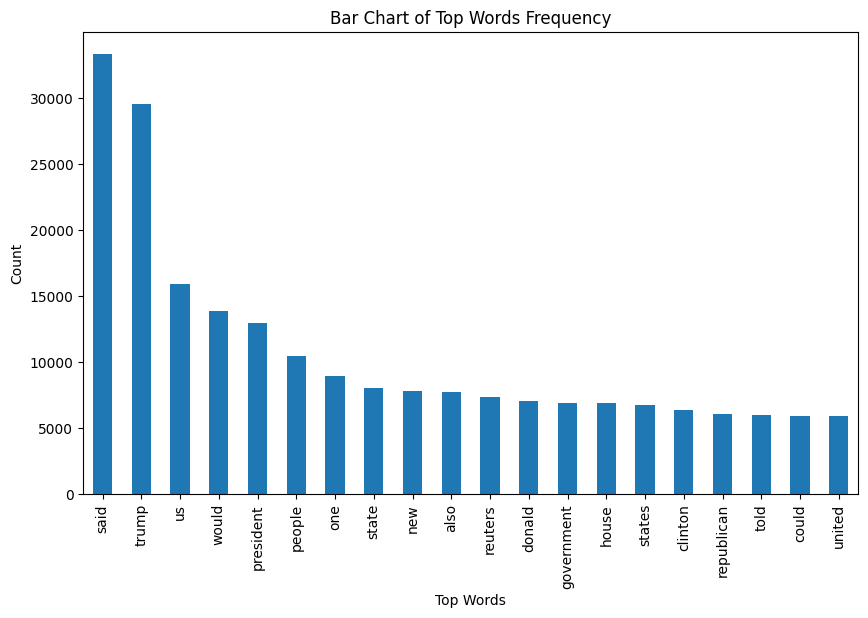

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(news['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(news['text'],
                                                    news['class'],
                                                    test_size=0.25)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [55]:
# For training we will first use Logistic Regression and evaluate the prediction accuracy using accuracy_score.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9903823319876514
0.9764957264957265


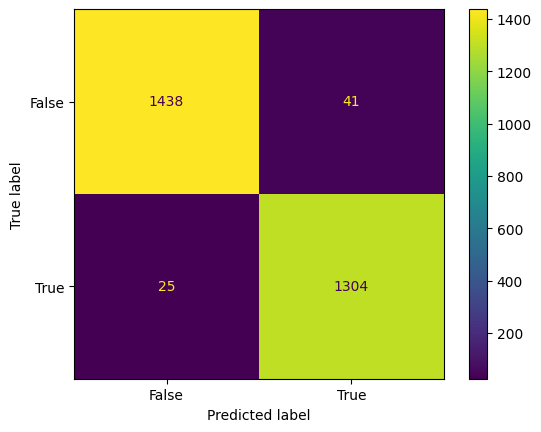

In [57]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()

In [63]:
import pickle
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorization, vectorizer_file)
# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)